In [2]:
import pandas as pd

df = pd.read_csv('data/Fish.csv')

In [8]:
cond = df['Species'].isin(['Bream', 'Smelt'])
fish_data = df.loc[cond, ['Length2', 'Weight']]
fish_data.head()

,Length2,Weight
0,25.4,242.0
1,26.3,290.0
2,26.5,340.0
3,29.0,363.0
4,29.0,430.0


In [10]:
fish_target = df.loc[cond, ['Species']]
fish_target.head()

,Species
0,Bream
1,Bream
2,Bream
3,Bream
4,Bream


In [11]:
from sklearn.model_selection import train_test_split

In [19]:
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target)

In [15]:
# print(len(train_input))
# print(len(test_input))
# print(len(train_target))
# print(len(test_target))

36
13
36
13


In [21]:
# test_target # 잘 섞였는지 확인

In [24]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()

kn.fit(train_input, train_target['Species']) # 학습

KNeighborsClassifier()

In [27]:
kn.score(test_input, test_target['Species']) # 채점

1.0

In [29]:
kn.predict([[25, 150]])

C:\Users\1-14\Desktop\DAMF2\ml\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Smelt'], dtype=object)

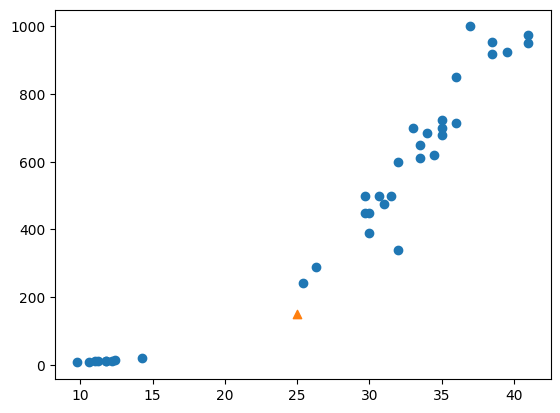

In [31]:
import matplotlib.pyplot as plt

plt.scatter(train_input['Length2'], train_input['Weight'])
plt.scatter(25, 150, marker='^') # marker: 모양 바꾸기

In [32]:
kn.kneighbors([[25, 150]]) # 가까이에 있는 데이터와 거리를 계산해서 보여줌

C:\Users\1-14\Desktop\DAMF2\ml\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


(array([[ 92.00086956, 130.73859415, 137.17988191, 138.39320793,
         140.00603558]]),
 array([[ 5, 31, 22, 27, 10]]))

In [35]:
mean = train_input.mean()
std = train_input.std()
print(mean)
print(std)

Length2     28.177778
Weight     485.955556
dtype: float64
Length2     10.287499
Weight     336.639173
dtype: float64


In [39]:
train_scaled = (train_input - mean) / std

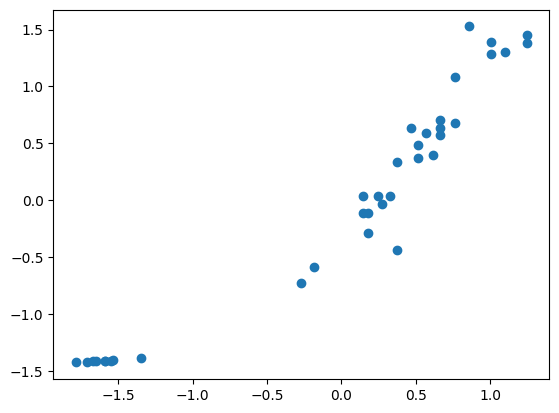

In [40]:
plt.scatter(train_scaled['Length2'], train_scaled['Weight'])

In [42]:
kn.fit(train_scaled, train_target['Species'])

KNeighborsClassifier()

In [43]:
test_scaled = (test_input - mean) / std

In [45]:
kn.score(test_scaled, test_target['Species'])

1.0

In [52]:
new = ([25, 150] - mean) / std
new

Length2   -0.308897
Weight    -0.997969
dtype: float64

In [53]:
kn.predict([new])

C:\Users\1-14\Desktop\DAMF2\ml\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Bream'], dtype=object)